## **Compare performance of linear models (OLS-Ridge-Lasso) on Boston dataset**

In [ ]:
!pip install mglearn

## Ordinary Least Squared - Boston dataset

In [4]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
 
lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_)) 


lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+0

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test))) 


Training set score: 0.95
Test set score: 0.61


In [ ]:
# With linear regression, we were overfitting our data

## Ridge Regression - Boston dataset

In [7]:
from sklearn.linear_model import Ridge 

ridge = Ridge().fit(X_train, y_train)


In [8]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test))) 


Training set score: 0.89
Test set score: 0.75


In [ ]:
# Ridge is a more restricted model, so we are less likely to overfit. 

**Try with different alpha**

In [11]:
# Alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test))) 


Training set score: 0.79
Test set score: 0.64


In [14]:
# Alpha = 1 (default)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge1.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge1.score(X_test, y_test))) 

Training set score: 0.89
Test set score: 0.75


In [12]:
# Alpha = 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test))) 


Training set score: 0.93
Test set score: 0.77


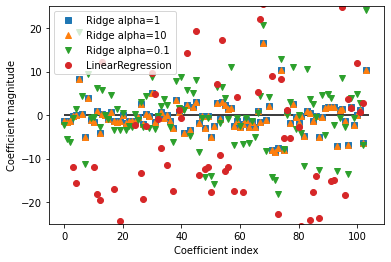

In [17]:
from matplotlib import pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1") 
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10") 
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression") 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.hlines(0, 0, len(lr.coef_)) 
plt.ylim(-25, 25) 
plt.legend() 


**Fix alpha but vary the amount of  training data**

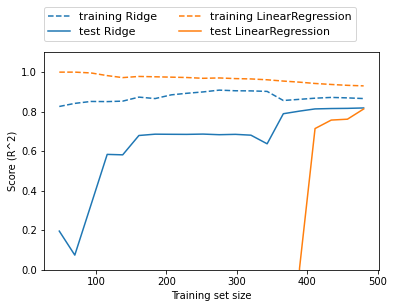

In [18]:
mglearn.plots.plot_ridge_n_samples()

## Lasso Regression - Boston dataset

In [21]:
import numpy as np

from sklearn.linear_model import Lasso 

lasso = Lasso().fit(X_train, y_train)

In [22]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [ ]:
# only 4 out of 105 features are used

**Try with different alpha**

In [23]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0))) 


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [ ]:
# The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. 
# This makes this model potentially easier to understand. 


In [24]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0))) 


Training set score: 0.95
Test set score: 0.64
Number of features used: 96


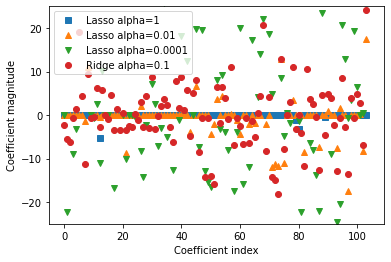

In [25]:
from matplotlib import pyplot as plt

plt.plot(lasso.coef_, 's', label="Lasso alpha=1") 
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01") 
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1") 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.hlines(0, 0, len(ridge01.coef_)) 
plt.ylim(-25, 25) 
plt.legend() 